In [1]:
# The code was removed by Watson Studio for sharing.

## The Battle of the Neighborhoods - Week 5

### Download and Explore Farmers Market dataset

#### Download all the dependencies needed

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y
import seaborn as sns

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [54]:
#import os
#cwd = os.getcwd()
#cwd

The dataset is downloaded from the website. The link is as given below :

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

In [38]:
# Data from website - https://data.ctyofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2
FM_NYC= pd.read_csv('DOHMH-farmers-markets.csv')
FM_NYC.columns = ["Borough","Service_Type","Market Name","Street Address","Latitude","Longitude","Days of Operation","Hours of Operations","Season Dates","Accepts EBT","Open Year-Round","Stellar Cooking Demonstrations","Food Activities for Kids","Location Point"," Unnamed-1", "Unnamed-2"]

In [39]:
FM_NYC.head()

,Borough,Service_Type,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point,Unnamed-1,Unnamed-2
0,Bronx,Farmers Market,Bissel Gardens Farmers Market,Baychester Ave & E 241st St,40.901520,-73.846937,Wednesday & Saturday,9 a.m. - 5 p.m.,07/06/2019-11/27/2019,No,No,No,No,"(40.90152, -73.846937)",NaN,NaN
1,Bronx,Farmers Market,Bronx Borough Hall Greenmarket,Grand Concourse bet E 161st & 162nd Sts,40.826835,-73.922621,Tuesday,8 a.m. - 4 p.m.,06/04/19-11/26/19,Yes,No,Yes,No,"(40.826835, -73.922621)",NaN,NaN
2,Bronx,Farmers Market,Bronx Family Center Go!Healthy Farm Stand,1515 Southern Blvd,40.833734,-73.889934,Thursday,9:30 a.m. - 3:30 p.m.,07/11/2019-11/21/2019,Yes,No,No,Yes,"(40.833734, -73.889934)",NaN,NaN
3,Bronx,Farmers Market,BronxWorks Farm Stand,1130 Grand Concourse,40.832331,-73.919590,Thursday,10 a.m. -4 p.m.,07/08/2019-11/22/2019,Yes,No,No,No,"(40.832331, -73.91959)",NaN,NaN
4,Bronx,Farmers Market,CS211 Go!Healthy Farm Stand,1919 Prospect Ave,40.843546,-73.889755,Wednesday,2:30 - 5:30 p.m.,07/08/2019- 11/22/2019,Yes,No,No,No,"(40.843546, -73.889755)",NaN,NaN


Website-https://www.grownyc.org/greenmarketco/foodbox <Br>
GrowNYC's Fresh ***Food Box*** Program is a food access initiative that enables under-served communities to purchase fresh, healthy, and primarily regionally grown produce well below traditional retail prices.
    
A ***farmers' market*** is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.

So, in this we will filter farmers' market data and explore it.

In [40]:
#FM_NYC.rename(columns={'Service Type':'Service_Type'}, inplace=True)
print(FM_NYC.Service_Type.unique())

['Farmers Market' 'Food Boxex']


In [41]:
FM_NYC['Service_Type'].value_counts().to_frame()

,Service_Type
Farmers Market,122
Food Boxex,16


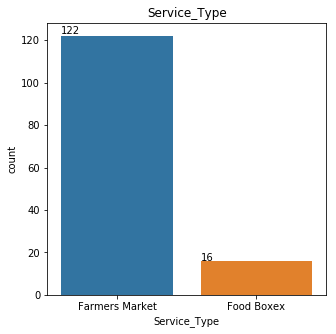

In [42]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Service_Type',data=FM_NYC)
ax.set_title("Service_Type")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [48]:
# FM_NYC_filtered - Dataset with only Farmers Market
FM_NYC_filtered = FM_NYC[FM_NYC['Service_Type'] == 'Farmers Market'].copy()
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()

(122, 16)


,Borough,Service_Type,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point,Unnamed-1,Unnamed-2
0,Bronx,Farmers Market,Bissel Gardens Farmers Market,Baychester Ave & E 241st St,40.901520,-73.846937,Wednesday & Saturday,9 a.m. - 5 p.m.,07/06/2019-11/27/2019,No,No,No,No,"(40.90152, -73.846937)",NaN,NaN
1,Bronx,Farmers Market,Bronx Borough Hall Greenmarket,Grand Concourse bet E 161st & 162nd Sts,40.826835,-73.922621,Tuesday,8 a.m. - 4 p.m.,06/04/19-11/26/19,Yes,No,Yes,No,"(40.826835, -73.922621)",NaN,NaN
2,Bronx,Farmers Market,Bronx Family Center Go!Healthy Farm Stand,1515 Southern Blvd,40.833734,-73.889934,Thursday,9:30 a.m. - 3:30 p.m.,07/11/2019-11/21/2019,Yes,No,No,Yes,"(40.833734, -73.889934)",NaN,NaN
3,Bronx,Farmers Market,BronxWorks Farm Stand,1130 Grand Concourse,40.832331,-73.919590,Thursday,10 a.m. -4 p.m.,07/08/2019-11/22/2019,Yes,No,No,No,"(40.832331, -73.91959)",NaN,NaN
4,Bronx,Farmers Market,CS211 Go!Healthy Farm Stand,1919 Prospect Ave,40.843546,-73.889755,Wednesday,2:30 - 5:30 p.m.,07/08/2019- 11/22/2019,Yes,No,No,No,"(40.843546, -73.889755)",NaN,NaN


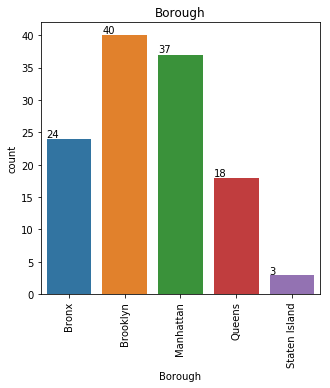

In [49]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

Manhattan amd Brooklyn has highest numbers of Farmers Markets

#### Use geopy library to get the latitude and longitude values of New York City.

The geograpical coordinate of New York City are 40.7308619, -73.9871558.

In [50]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with Facility name and Borough of Farmers Market superimposed on top.

In [53]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC_filtered['Latitude'], FM_NYC_filtered['Longitude'],FM_NYC_filtered['Market Name'], FM_NYC_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets